In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
dataset = pd.read_csv('2023_matchday_results.csv')
X = dataset.iloc[:, [3, 6]].values

In [35]:
X

array([[52, 42],
       [36, 40],
       [35, 66],
       [63, 39],
       [46, 55],
       [34, 65],
       [47, 41],
       [45, 49],
       [33, 51],
       [48, 50],
       [42, 46],
       [66, 45],
       [55, 33],
       [51, 34],
       [49, 47],
       [40, 52],
       [50, 35],
       [65, 48],
       [41, 63],
       [39, 36],
       [35, 42],
       [52, 66],
       [45, 65],
       [36, 55],
       [63, 49],
       [46, 41],
       [33, 40],
       [34, 50],
       [47, 39],
       [48, 51],
       [42, 36],
       [66, 48],
       [55, 45],
       [51, 63],
       [49, 46],
       [40, 35],
       [50, 52],
       [65, 47],
       [41, 33],
       [39, 34],
       [35, 39],
       [42, 66],
       [36, 51],
       [63, 45],
       [46, 33],
       [48, 47],
       [52, 55],
       [41, 49],
       [40, 34],
       [50, 65],
       [66, 50],
       [55, 63],
       [51, 46],
       [49, 48],
       [45, 40],
       [33, 42],
       [34, 52],
       [65, 35],
       [47, 36

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

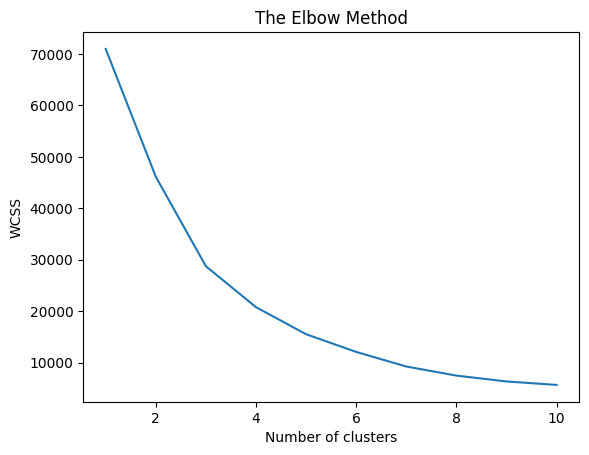

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


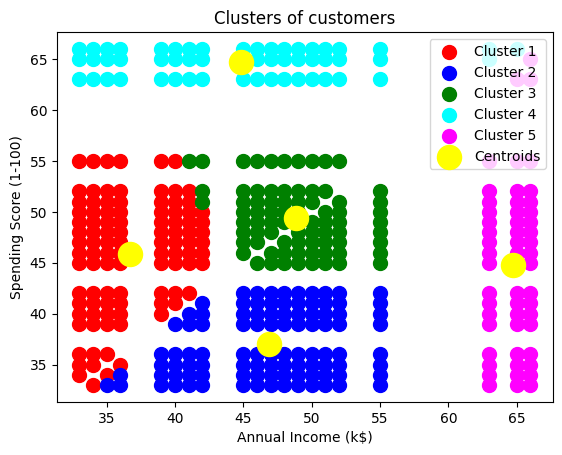

In [38]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [40]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.744498982435654
